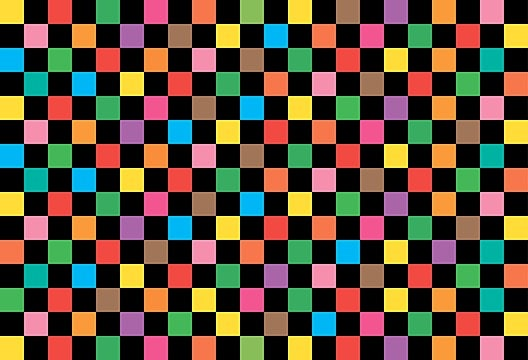

In [26]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('colorsquare.jpg')  # Reads in BGR format
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

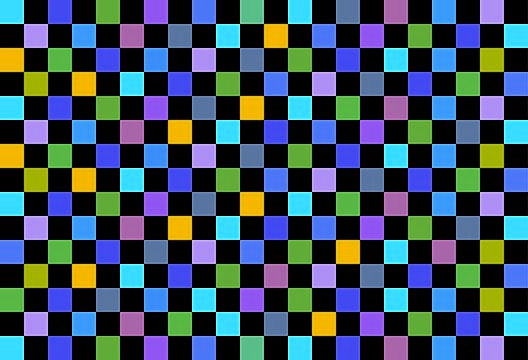

In [27]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image_rgb)

In [28]:
import pandas as pd
df = pd.read_csv('color_names.csv')
df.drop(['Hex (24 bit)','Hue (degrees)','HSL.S (%)','HSL.L (%), HSV.S (%), HSV.V (%)'],axis=1,inplace=True)
df

,Name,Red (8 bit),Green (8 bit),Blue (8 bit)
0,Absolute zero,0,72,186
1,Acid green,176,191,26
2,Aero,124,185,232
3,Aero blue,201,255,229
4,African violet,178,132,190
...,...,...,...,...
1293,Yellow rose,255,240,0
1294,Yellow Sunshine,255,247,0
1295,Zaffre,0,20,168
1296,Zinnwaldite brown,44,22,8


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df['Name'])
df['Name'] = le.transform(df['Name'])

In [30]:
X_train = df[['Red (8 bit)','Green (8 bit)','Blue (8 bit)']]
y_train = df['Name']

In [31]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)  # 1, 3 or 5 usually work well
model.fit(X_train.values,y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
y_train

,Name
0,0
1,1
2,2
3,3
4,4
...,...
1293,1286
1294,1285
1295,1288
1296,1289


In [37]:
#We will try efficiency of this code on first 5 rows of the image
for i in range(5):
  for j in range(len(image_rgb)):
      color=model.predict([image_rgb[i][j]])
      print('color of pixel in',i,j,'is',le.inverse_transform(color))

color of pixel in 0 0 is ['Banana yellow']
color of pixel in 0 1 is ['Banana yellow']
color of pixel in 0 2 is ['Banana yellow']
color of pixel in 0 3 is ['Banana yellow']
color of pixel in 0 4 is ['Banana yellow']
color of pixel in 0 5 is ['Banana yellow']
color of pixel in 0 6 is ['Banana yellow']
color of pixel in 0 7 is ['Banana yellow']
color of pixel in 0 8 is ['Banana yellow']
color of pixel in 0 9 is ['Banana yellow']
color of pixel in 0 10 is ['Banana yellow']
color of pixel in 0 11 is ['Banana yellow']
color of pixel in 0 12 is ['Banana yellow']
color of pixel in 0 13 is ['Banana yellow']
color of pixel in 0 14 is ['Banana yellow']
color of pixel in 0 15 is ['Banana yellow']
color of pixel in 0 16 is ['Banana yellow']
color of pixel in 0 17 is ['Banana yellow']
color of pixel in 0 18 is ['Banana yellow']
color of pixel in 0 19 is ['Banana yellow']
color of pixel in 0 20 is ['Banana yellow']
color of pixel in 0 21 is ['Banana yellow']
color of pixel in 0 22 is ['Lemon yellow']